In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv('C:\\Users\\Saira\\Desktop\ML\\Individual_Assignment-Project\\owid-covid-data2.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,23/1/2020,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,24/1/2020,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,25/1/2020,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,26/1/2020,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,27/1/2020,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60475,ZWE,Africa,Zimbabwe,29/11/2020,9822.0,0.0,86.000,275.0,0.0,1.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
60476,ZWE,Africa,Zimbabwe,30/11/2020,9950.0,128.0,91.714,276.0,1.0,0.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
60477,ZWE,Africa,Zimbabwe,1/12/2020,10129.0,179.0,104.429,277.0,1.0,0.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
60478,ZWE,Africa,Zimbabwe,2/12/2020,10129.0,0.0,88.714,277.0,0.0,0.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [4]:
df.describe
#It has 50 columns and 60480 - we would filter for the required columns only


<bound method NDFrame.describe of       iso_code continent     location        date  total_cases  new_cases  \
0          AFG      Asia  Afghanistan   23/1/2020          NaN        0.0   
1          AFG      Asia  Afghanistan   24/1/2020          NaN        0.0   
2          AFG      Asia  Afghanistan   25/1/2020          NaN        0.0   
3          AFG      Asia  Afghanistan   26/1/2020          NaN        0.0   
4          AFG      Asia  Afghanistan   27/1/2020          NaN        0.0   
...        ...       ...          ...         ...          ...        ...   
60475      ZWE    Africa     Zimbabwe  29/11/2020       9822.0        0.0   
60476      ZWE    Africa     Zimbabwe  30/11/2020       9950.0      128.0   
60477      ZWE    Africa     Zimbabwe   1/12/2020      10129.0      179.0   
60478      ZWE    Africa     Zimbabwe   2/12/2020      10129.0        0.0   
60479      ZWE    Africa     Zimbabwe   3/12/2020      10424.0      295.0   

       new_cases_smoothed  total_deaths  

In [5]:
df.head
#get columns 'iso_code','location','date','total_cases','new_cases','total_tests','new_tests'

<bound method NDFrame.head of       iso_code continent     location        date  total_cases  new_cases  \
0          AFG      Asia  Afghanistan   23/1/2020          NaN        0.0   
1          AFG      Asia  Afghanistan   24/1/2020          NaN        0.0   
2          AFG      Asia  Afghanistan   25/1/2020          NaN        0.0   
3          AFG      Asia  Afghanistan   26/1/2020          NaN        0.0   
4          AFG      Asia  Afghanistan   27/1/2020          NaN        0.0   
...        ...       ...          ...         ...          ...        ...   
60475      ZWE    Africa     Zimbabwe  29/11/2020       9822.0        0.0   
60476      ZWE    Africa     Zimbabwe  30/11/2020       9950.0      128.0   
60477      ZWE    Africa     Zimbabwe   1/12/2020      10129.0      179.0   
60478      ZWE    Africa     Zimbabwe   2/12/2020      10129.0        0.0   
60479      ZWE    Africa     Zimbabwe   3/12/2020      10424.0      295.0   

       new_cases_smoothed  total_deaths  new_

In [6]:
#extracting the required columns only
df=df[['iso_code','location','date','total_cases','new_cases','total_tests','new_tests']]
df

,iso_code,location,date,total_cases,new_cases,total_tests,new_tests
0,AFG,Afghanistan,23/1/2020,NaN,0.0,NaN,NaN
1,AFG,Afghanistan,24/1/2020,NaN,0.0,NaN,NaN
2,AFG,Afghanistan,25/1/2020,NaN,0.0,NaN,NaN
3,AFG,Afghanistan,26/1/2020,NaN,0.0,NaN,NaN
4,AFG,Afghanistan,27/1/2020,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...
60475,ZWE,Zimbabwe,29/11/2020,9822.0,0.0,168212.0,965.0
60476,ZWE,Zimbabwe,30/11/2020,9950.0,128.0,169009.0,797.0
60477,ZWE,Zimbabwe,1/12/2020,10129.0,179.0,170038.0,1029.0
60478,ZWE,Zimbabwe,2/12/2020,10129.0,0.0,171900.0,1862.0


In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60480 entries, 0 to 60479
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   iso_code     60164 non-null  object 
 1   location     60478 non-null  object 
 2   date         60480 non-null  object 
 3   total_cases  51743 non-null  float64
 4   new_cases    60356 non-null  float64
 5   total_tests  24032 non-null  float64
 6   new_tests    23861 non-null  float64
dtypes: float64(4), object(3)
memory usage: 3.2+ MB


In [8]:
df.isnull().sum()
#Location has no null value

iso_code         316
location           2
date               0
total_cases     8737
new_cases        124
total_tests    36448
new_tests      36619
dtype: int64

In [9]:
df[df['location'].isnull()==True]
# 2 rows have Location as Null 

,iso_code,location,date,total_cases,new_cases,total_tests,new_tests
32635,MYS,NaN,7/2/2020,12.0,0.0,0.0,0.0
32636,MYS,NaN,8/2/2020,16.0,4.0,0.0,0.0


In [10]:
df=df[df['iso_code']=='MYS']

df['location'] = np.where(df['location'].isnull() ,'Malaysia',df['location'])
#df['Final Rate'] = np.where(df['Hourly Rate'].isnull(),df['Daily Rate'],df['Hourly Rate'])

#df_mys['location']=df_mys['location'].apply(lambda x: 'Malaysia' if x['location'].isnull()  else df_mys['location'])

df[df['location'].isnull()==True]


,iso_code,location,date,total_cases,new_cases,total_tests,new_tests


In [11]:
df.isnull().sum()

iso_code        0
location        0
date            0
total_cases     0
new_cases       1
total_tests     0
new_tests      47
dtype: int64

In [12]:
df[df['new_cases'].isnull()==True]


,iso_code,location,date,total_cases,new_cases,total_tests,new_tests
32720,MYS,Malaysia,2/5/2020,6176.0,NaN,184213.0,15429.0


In [13]:
df.loc[32720]

iso_code            MYS
location       Malaysia
date           2/5/2020
total_cases        6176
new_cases           NaN
total_tests      184213
new_tests         15429
Name: 32720, dtype: object

In [14]:
#cleaning new cases
for index, row in df.iterrows(): 
    if np.isnan(df.loc[index, 'new_cases']):
        if np.isnan(df.loc[index, 'total_cases']):
            df.drop(index)
        else:
            df.loc[index, 'new_cases'] =  df.loc[index , 'total_cases']-df.loc[(index - 1), 'total_cases']

In [15]:
df.loc[32720]

iso_code            MYS
location       Malaysia
date           2/5/2020
total_cases        6176
new_cases           105
total_tests      184213
new_tests         15429
Name: 32720, dtype: object

In [16]:
df[df['new_tests'].isnull()==True]


,iso_code,location,date,total_cases,new_cases,total_tests,new_tests
32642,MYS,Malaysia,14/2/2020,19.0,0.0,653.0,NaN
32643,MYS,Malaysia,15/2/2020,22.0,3.0,653.0,NaN
32644,MYS,Malaysia,16/2/2020,22.0,0.0,656.0,NaN
32647,MYS,Malaysia,19/2/2020,22.0,0.0,797.0,NaN
32648,MYS,Malaysia,20/2/2020,22.0,0.0,880.0,NaN
32650,MYS,Malaysia,22/2/2020,22.0,0.0,968.0,NaN
32651,MYS,Malaysia,23/2/2020,22.0,0.0,1028.0,NaN
32657,MYS,Malaysia,29/2/2020,25.0,2.0,1548.0,NaN
32658,MYS,Malaysia,1/3/2020,29.0,4.0,1648.0,NaN
32659,MYS,Malaysia,2/3/2020,29.0,0.0,1739.0,NaN


In [17]:
#cleaning new tests
for index, row in df.iterrows(): 
    if np.isnan(df.loc[index, 'new_tests']):
        if np.isnan(df.loc[index, 'total_tests']) or df.loc[index, 'total_tests']==0.0:
            df.drop(index)
        else:
            df.loc[index, 'new_tests'] =  df.loc[index , 'total_tests']-df.loc[(index - 1), 'total_tests']

In [18]:
df[df['new_tests'].isnull()==True]
#df.drop[32636]

,iso_code,location,date,total_cases,new_cases,total_tests,new_tests


In [19]:
df.isnull().sum()


iso_code       0
location       0
date           0
total_cases    0
new_cases      0
total_tests    0
new_tests      0
dtype: int64

### DATA Cleaning Complete since there are no null values in required columns - iso_code, location, date, total_cases, new_cases, total_tests, new_tests



# Start with Model Building

In [20]:
#Augmented Dickey–Fuller test (adf) is used in statistics and econometrics and it tests the null hypothesis that a unit root is present in a time series sample
#crete MEthod for ADF
from statsmodels.tsa.stattools import adfuller
def print_adf_result(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

## Ref: https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test

In [21]:
#Kwiatkowski–Phillips–Schmidt–Shin (KPSS) tests are used for testing a null hypothesis that an observable time series is stationary around a deterministic trend (i.e. trend-stationary) against the alternative of a unit root

#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def print_kpss_result(timeseries):
    print ('Results of KPSS Test is as under:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
      kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
#Reference https://en.wikipedia.org/wiki/KPSS_test

In [22]:
#Convert String data to date datatype for time series calcualtion

df['date'] = pd.to_datetime(df['date'],format="%d/%m/%Y")

In [23]:
df['date'].min(),df['date'].max()
#the date range of dta would e printed
#df

(Timestamp('2020-01-23 00:00:00'), Timestamp('2020-12-03 00:00:00'))

In [24]:
#Set standard for matplot parameters
import matplotlib as mpl

def set_plot_colour(COLOR):
    mpl.rcParams['text.color'] = COLOR
    mpl.rcParams['axes.labelcolor'] = COLOR
    mpl.rcParams['xtick.color'] = COLOR
    mpl.rcParams['ytick.color'] = COLOR
    

mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
#set colour
COLOR = 'pink'
set_plot_colour(COLOR)

### Objective 1:
Considering current trend of COVID-19 cases in Malaysia, I want to determine if Malaysia could achieve 14 days average of below 100 cases/day within the next 3 months(Cumulative count of new cases over 14 consecutive days should be less than 1400).


In [25]:
df_cases=df[['date','new_cases']]
#set index 
df_cases=df_cases.set_index('date')

In [26]:
cases_ts_weekly_avg = df_cases['new_cases'].resample('W').mean()
#W : weekly frequency
#M : month end frequency
#SM : semi-month end frequency (15th and end of month)
#Q : quarter end frequency
cases_ts_weekly_avg

date
2020-01-26       1.500000
2020-02-02       0.571429
2020-02-09       1.142857
2020-02-16       0.857143
2020-02-23       0.000000
2020-03-01       1.000000
2020-03-08      10.000000
2020-03-15      47.000000
2020-03-22     125.428571
2020-03-29     166.285714
2020-04-05     170.285714
2020-04-12     145.857143
2020-04-19     100.857143
2020-04-26      55.857143
2020-05-03      74.000000
2020-05-10      51.142857
2020-05-17      34.000000
2020-05-24      50.142857
2020-05-31      82.000000
2020-06-07      71.857143
2020-06-14      18.714286
2020-06-21      17.000000
2020-06-28       8.857143
2020-07-05       4.142857
2020-07-12       7.857143
2020-07-19       8.714286
2020-07-26      16.857143
2020-08-02      14.571429
2020-08-09      12.000000
2020-08-16      16.714286
2020-08-23       9.571429
2020-08-30       9.571429
2020-09-06       9.000000
2020-09-13      74.000000
2020-09-20      43.428571
2020-09-27     100.000000
2020-10-04     208.857143
2020-10-11     468.000000
2020-10

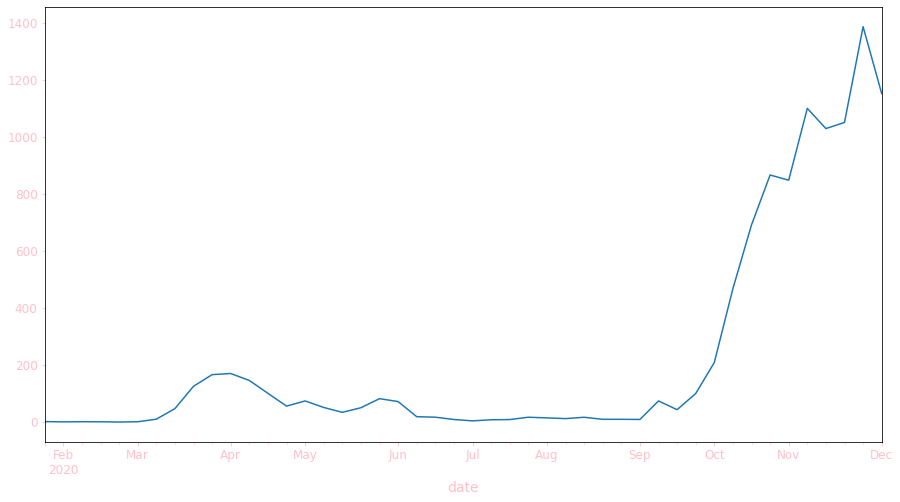

In [27]:
#show plot
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')

cases_ts_weekly_avg.plot(figsize=(15, 8))
plt.show()

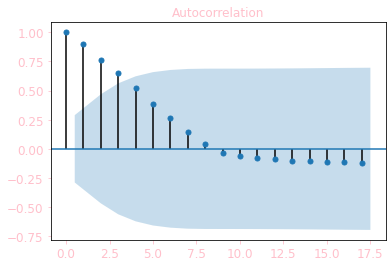

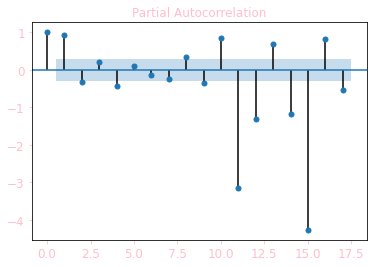

In [28]:
# Plotting the ACF and PACF Plot of the Trend and Seasonally adjusted Time Series data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(cases_ts_weekly_avg)
mpl.pyplot.show()
#Plot the autocorrelation function
#Plots lags on the horizontal and the correlations on vertical axis.
plot_pacf(cases_ts_weekly_avg)
mpl.pyplot.show()


In [30]:
#apply adf test on the series to check whether <>
print(print_adf_result(cases_ts_weekly_avg))
print(print_kpss_result(cases_ts_weekly_avg))

Results of Dickey-Fuller Test:
Test Statistic                  0.709449
p-value                         0.990025
#Lags Used                      4.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64
None
Results of KPSS Test is as under:
Test Statistic            0.371216
p-value                   0.089562
Lags Used                10.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None


In [31]:
ts_cases_adj =cases_ts_weekly_avg

In [36]:
import itertools
import statsmodels.api as sm

#setting prameters for SARIMA
p = range(0, 3)
d = range(1,2)
q = range(0, 4)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
seasonal_pdq

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (0, 1, 1) x (0, 1, 2, 12)
SARIMAX: (0, 1, 2) x (0, 1, 3, 12)


[(0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 1, 3, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12)]

In [37]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts_cases_adj,
                                            order=param,
                                            seasonal_order=param_seasonal,)
            results = mod.fit(method = 'powell')
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Optimization terminated successfully.
         Current function value: 4.447524
         Iterations: 2
         Function evaluations: 42
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:411.17224224197446
Optimization terminated successfully.
         Current function value: 4.447461
         Iterations: 2
         Function evaluations: 45
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:413.1664034249974
Optimization terminated successfully.
         Current function value: 4.443125
         Iterations: 2
         Function evaluations: 68
ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:414.7674856392272
Optimization terminated successfully.
         Current function value: 4.443231
         Iterations: 3
         Function evaluations: 145
ARIMA(0, 1, 0)x(0, 1, 3, 12)12 - AIC:416.7772622578387
Optimization terminated successfully.
         Current function value: 4.447490
         Iterations: 2
         Function evaluations: 44
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:413.1690913907694
Optimization terminated successfully.


In [38]:
#ARIMA(0, 1, 1)x(2, 1, 0, 12)
mod = sm.tsa.statespace.SARIMAX(ts_cases_adj,
                                            order=param,
                                            seasonal_order=param_seasonal,)
results = mod.fit(method = 'powell')
print(results.summary().tables[1])


Optimization terminated successfully.
         Current function value: 4.329736
         Iterations: 7
         Function evaluations: 989
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8464      0.523     -1.618      0.106      -1.872       0.179
ar.L2         -0.2888      0.580     -0.498      0.618      -1.425       0.848
ma.L1          0.9324   2.02e+05   4.61e-06      1.000   -3.96e+05    3.96e+05
ma.L2          0.7060   1.37e+04   5.16e-05      1.000   -2.68e+04    2.68e+04
ma.L3          0.7736   1.56e+05   4.94e-06      1.000   -3.07e+05    3.07e+05
ar.S.L12      -0.1122   1.17e+05  -9.61e-07      1.000   -2.29e+05    2.29e+05
ar.S.L24      -0.2411   2.71e+05   -8.9e-07      1.000   -5.31e+05    5.31e+05
ma.S.L12       0.0748   1.04e+05   7.18e-07      1.000   -2.04e+05    2.04e+05
ma.S.L24       0.0519   5.73e+05   9.05e-08      1.000   -1.12e+06    1.

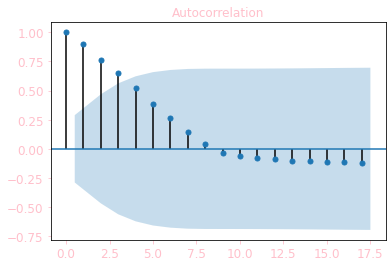

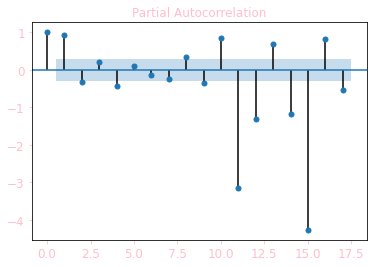

In [39]:
# Plotting the ACF and PACF Plot of the Trend and Seasonally adjusted Time Series data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ts_cases_adj)
mpl.pyplot.show()
plot_pacf(ts_cases_adj)
mpl.pyplot.show()

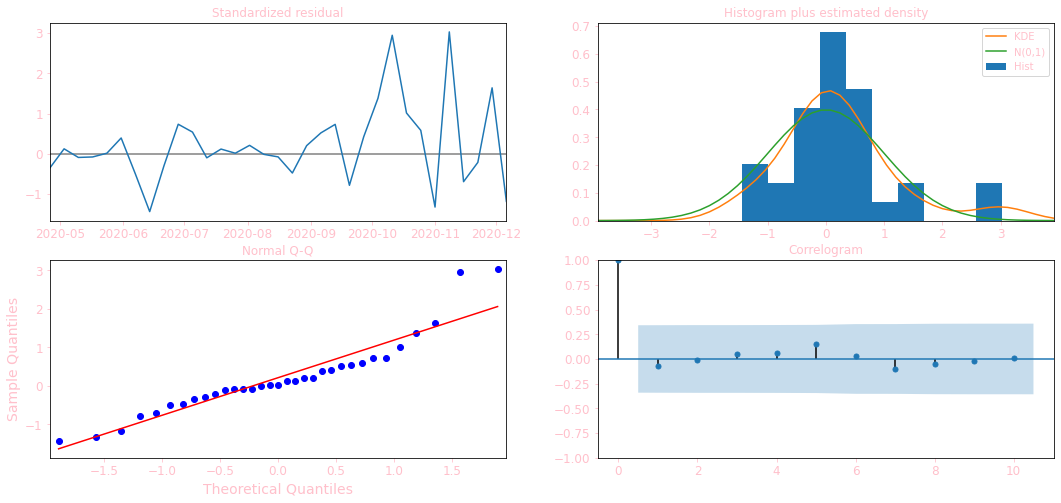

In [42]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

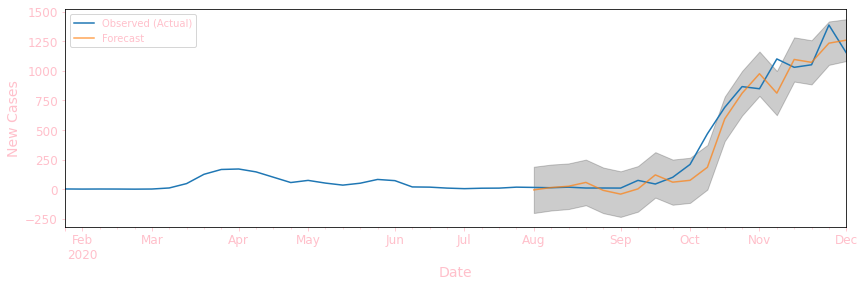

In [46]:
pred = results.get_prediction(start=pd.to_datetime('2020-08-02'), dynamic=False)
pred_ci = pred.conf_int()
ax = ts_cases_adj.plot(label='Observed (Actual)')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('New Cases')
plt.legend()
plt.show()

In [47]:
#WRITE IS THIS GOOD OR BAD
y_forecasted = pred.predicted_mean
y_truth = ts_cases_adj['2020-08-02':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 14145.61
The Root Mean Squared Error is 118.94


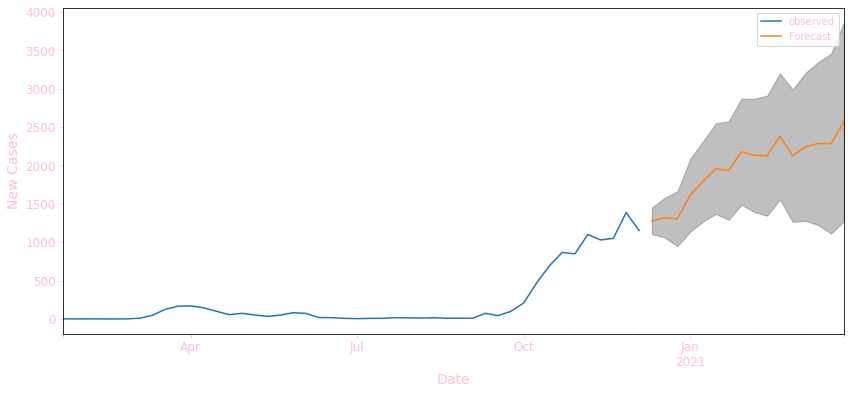

In [48]:
pred_uc = results.get_forecast(steps=16)
pred_ci = pred_uc.conf_int()
ax = ts_cases_adj.plot(label='Observed', figsize=(14, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('New Cases')
plt.legend()
plt.show()

In [49]:
pred_uc

In [52]:
pred_ci

,lower new_cases,upper new_cases
2020-12-13,1106.179080,1450.923494
2020-12-20,1061.319248,1578.771655
2020-12-27,948.739713,1663.060790
2021-01-03,1136.866261,2087.511658
2021-01-10,1269.621323,2315.678892
2021-01-17,1369.343582,2548.806036
2021-01-24,1290.954341,2576.589076
2021-01-31,1487.613789,2870.406136
2021-02-07,1392.991878,2870.623077
2021-02-14,1344.875137,2908.892261


In [53]:
list(pred_ci.columns.values)


['lower new_cases', 'upper new_cases']

In [ ]:
#red_ci[['lower new_cases', 'upper new_cases']]
pred_ci['lower new_cases']

In [54]:
pred_ci.filter('')
df_result=pred_ci[(pred_ci['lower new_cases'] <=100.0) | (pred_ci['upper new_cases'] <=100.0)]
df_result

,lower new_cases,upper new_cases


In [ ]:
# Check for 2 consecutive weeks

### there is not even a single week where average is less than 100 cases /day
## Based on current trend of data it seems difficult that Malaysia would achieve trend on 100 cases per week in next three months

# Time series analysis for COVID19 Test Kit prediction

In [ ]:
df_new_test=df[['date','new_tests']]
df_new_test

In [ ]:
df_new_test=df_new_test.set_index('date')
df_new_test

In [ ]:
tests_ts_weekly_avg = df_new_test['new_tests'].resample('W').mean()
#W : weekly frequency
#M : month end frequency
#SM : semi-month end frequency (15th and end of month)
#Q : quarter end frequency
tests_ts_weekly_avg

In [ ]:
#show plot
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')

tests_ts_weekly_avg.plot(figsize=(15, 8))
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(tests_ts_weekly_avg)
mpl.pyplot.show()
#Plot the autocorrelation function
#Plots lags on the horizontal and the correlations on vertical axis.



In [ ]:
plot_pacf(tests_ts_weekly_avg)
mpl.pyplot.show()

import statsmodels.api as sm
from pylab import rcParams

#rcParams['figure.figsize'] = 18, 8
#decomposition = sm.tsa.seasonal_decompose(cases_ts_weekly_avg, model='additive')
#decomposition = sm.tsa.seasonal_decompose(cases_ts_weekly_avg)
#fig = decomposition.plot()
plt.show()
#Seasonality not applicable

In [ ]:
#apply adf test on the series
print(print_adf_result(tests_ts_weekly_avg))
print(print_kpss_result(tests_ts_weekly_avg))

In [ ]:
ts_tests_adj = tests_ts_weekly_avg - cases_ts_weekly_avg.shift(1)
#ts_tests_adj =tests_ts_weekly_avg
ts_tests_adj = tests_ts_weekly_avg.dropna()
ts_tests_adj.plot()

In [ ]:
print(print_adf_result(ts_tests_adj))

In [ ]:
#Plotting the ACF and PACF Plot of the Trend and Seasonally adjusted Time Series data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ts_tests_adj)
mpl.pyplot.show()
plot_pacf(ts_tests_adj)
mpl.pyplot.show()

In [ ]:
import itertools

#setting prameters for SARIMA
p = range(0, 3)
d = range(1,2)
q = range(0, 4)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('ARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('ARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('ARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
seasonal_pdq

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts_tests_adj,
                                            order=param,
                                            seasonal_order=param_seasonal,)
            results = mod.fit(method = 'powell')
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [ ]:
#ARIMA(0, 1, 1)x(2, 1, 0, 12)
mod = sm.tsa.statespace.SARIMAX(ts_tests_adj,
                                            order=param,
                                            seasonal_order=param_seasonal,)
results = mod.fit(method = 'powell')
print(results.summary().tables[1])

In [ ]:
#Plotting the ACF and PACF Plot of the Trend and Seasonally adjusted Time Series data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ts_tests_adj)
mpl.pyplot.show()
plot_pacf(ts_tests_adj)
mpl.pyplot.show()

In [ ]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2020-08-02'), dynamic=False)
pred_ci = pred.conf_int()
ax = ts_tests_adj.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('New tests')
plt.legend()
plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = ts_tests_adj['2020-08-02':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

df['date'].max()`

In [ ]:
pred_uc = results.get_forecast(steps=16)
pred_ci = pred_uc.conf_int()
ax = ts_tests_adj.plot(label='observed', figsize=(14, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('New Tests')
plt.legend()
plt.show()

In [ ]:
pred_ci

In [ ]:
pred_ci['kits_required']=pred_ci.mean(axis=1)
pred_ci

## Kits required for next 16 weeks

In [ ]:
pred_ci['kits_required']

In [ ]:
kits_required=pred_ci['kits_required']

## Kits required for next 4 months are as under

In [ ]:
kits_required[0:3].sum(),kits_required[4:7].sum(),kits_required[8:11].sum(),kits_required[12:15].sum()

# ARIMA code 2

In [ ]:
df_new_test=df[['date','new_tests']]


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame

model = ARIMA(np.asarray( df_new_test['new_tests']), order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error


X=np.asarray( df_new_test['new_tests'])
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()